In [189]:
import pandas as pd
import seaborn as sns
import numpy as np

In [72]:
files_4_nodes = ['hadoop_30_reps_p1.txt','hadoop_30_reps_p2.txt','hadoop_30_reps_p3.txt']
files_8_nodes = ['hadoop_30_reps_p1_8_nodes.txt','hadoop_30_reps_p2_8_nodes.txt']

In [73]:
hadoop_times = []

In [88]:
def process_experiments(files):
    
    hadoop_times = []
    
    for file in files:
        data = open(file,'r').read()
        experiments = data.split("Experiment")
        experiments = experiments[2:]
        for experiment in experiments:
            hadoop_times.append(get_iteration_times(experiment))
    return hadoop_times

In [89]:
def get_cpu_total_time(iteration_log):
    try:
        return iteration_log.split("CPU time spent")[1].split("\n\t")[0][6:]
    except:
        pass

In [90]:
def get_iteration_times(experiment_log):
    iteration_times = []
    iters_logs = experiment_log.split("Iteration")[1:]
    for iters in iters_logs:
        iteration_times.append(get_cpu_total_time(iters))
    return iteration_times

In [91]:
experiment_times_4 = process_experiments(files_4_nodes)

In [92]:
experiment_times_8 =  process_experiments(files_8_nodes)

In [116]:
e4 = [item for sublist in experiment_times_4 for item in sublist if item is not None]
e8 = [item for sublist in experiment_times_8 for item in sublist if item is not None]

In [194]:
np.mean(np.array(e4).astype(np.float)/1000)

C:\Users\magda\AppData\Local\Temp/ipykernel_18964/2240296940.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.mean(np.array(e4).astype(np.float)/1000)


3.6993360160965794

In [121]:
np.mean(np.array(e8).astype(np.float))

C:\Users\magda\AppData\Local\Temp/ipykernel_18964/861555079.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  np.mean(np.array(e8).astype(np.float))


3460.4761904761904

In [180]:
spark_files = ['PG_Spark_4.txt','PG_Spark_8.txt']

In [181]:
def run_spark_analysis():
    p = []
    for file in spark_files:
        data = open(file,'r').read()
        p.append(get_performance(data))
    return p

In [182]:
p4 = run_spark_analysis()[0]
p8 = run_spark_analysis()[1]

In [183]:
p4 = [x for x in p4 if x < 40]
p8 = [x for x in p8 if x < 40]

In [176]:
e4 = [item for sublist in experiment_times_4 for item in sublist if item is not None]


[[21,
  21,
  19,
  20,
  19,
  21,
  20,
  19,
  19,
  20,
  1500822353,
  1500822371,
  1500822388,
  1500822406,
  1500822423,
  1500822441,
  1500822458,
  1500822476,
  1500822494,
  1500822511,
  1500822528,
  1500822546,
  1500822564,
  1500822580,
  1500822598,
  1500822615,
  1500822633,
  1500822650,
  1500822666],
 [22,
  19,
  20,
  19,
  20,
  20,
  20,
  19,
  19,
  18,
  1500821459,
  1500821477,
  1500821494,
  1500821512,
  1500821529,
  1500821546,
  1500821564,
  1500821580,
  1500821598,
  1500821615,
  1500821632,
  1500821651,
  1500821668,
  1500821687,
  1500821704,
  1500821722,
  1500821739,
  1500821756,
  1500821774,
  21,
  21,
  19,
  20,
  19,
  21,
  20,
  19,
  19,
  20,
  1500822353,
  1500822371,
  1500822388,
  1500822406,
  1500822423,
  1500822441,
  1500822458,
  1500822476,
  1500822494,
  1500822511,
  1500822528,
  1500822546,
  1500822564,
  1500822580,
  1500822598,
  1500822615,
  1500822633,
  1500822650,
  1500822666]]

In [146]:
import time

In [168]:
int(data.split("Experiment")[3][6:16])

1667579222

In [165]:
def get_performance(experiences_logs):
    perf = []
    for exp in experiences_logs.split("Experiment"):
        try:
            perf.append(get_timestamps(exp))
        except:
            pass
    return perf

In [175]:
def get_timestamps(experiment_d):
    start = int(experiment_d[6:16])
    end =  int(experiment_d[-11:-1])
#     print("S", start)
#     print("E", end)
    duration = end - start
    return duration

In [164]:
get_timestamps(data.split("Experiment")[3])

S 1667580212
E 1667580231


19

In [198]:
data = pd.DataFrame(data=[(np.mean(np.array(e4).astype(np.float)/100),4, 'hadoop'), (np.mean(np.array(e8).astype(np.float)/100),8,'hadoop'), (np.mean(np.array(p4).astype(np.float)),4,'spark'),(np.mean(np.array(p8).astype(np.float)),8,'spark')],columns=["i_time","number_of_machines","system"])

C:\Users\magda\AppData\Local\Temp/ipykernel_18964/3501743544.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data = pd.DataFrame(data=[(np.mean(np.array(e4).astype(np.float)/100),4, 'hadoop'), (np.mean(np.array(e8).astype(np.float)/100),8,'hadoop'), (np.mean(np.array(p4).astype(np.float)),4,'spark'),(np.mean(np.array(p8).astype(np.float)),8,'spark')],columns=["i_time","number_of_machines","system"])


In [201]:
data_s = pd.DataFrame(data=[(np.min(np.array(e4).astype(np.float)/100),4, 'hadoop'), (np.min(np.array(e8).astype(np.float)/100),8,'hadoop'), (np.max(np.array(p4).astype(np.float)),4,'spark'),(np.max(np.array(p8).astype(np.float)),8,'spark')],columns=["i_time","number_of_machines","system"])

C:\Users\magda\AppData\Local\Temp/ipykernel_18964/1560301630.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data_s = pd.DataFrame(data=[(np.min(np.array(e4).astype(np.float)/100),4, 'hadoop'), (np.min(np.array(e8).astype(np.float)/100),8,'hadoop'), (np.max(np.array(p4).astype(np.float)),4,'spark'),(np.max(np.array(p8).astype(np.float)),8,'spark')],columns=["i_time","number_of_machines","system"])


D:\Users\magda\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


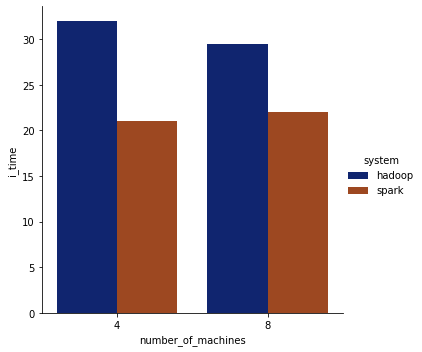

In [202]:
sns.factorplot(x='number_of_machines', y='i_time', hue='system', data=data_s, kind='bar',palette='dark')